In [1]:
tickers = ["AMZN", "TSLA", "BABA", "HD", "TM", "NKE", "MCD", "LOW", "SBUX", "JD", "PDD", "BKNG", "GM", "MELI", "TJX", "NIO", "F", "LULU", "HMC", "CMG"]

In [2]:
import sys
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

!{sys.executable} -m pip install matplotlib
!{sys.executable} -m pip install sklearn
!{sys.executable} -m pip install numpy
!{sys.executable} -m pip install pandas

%matplotlib inline

/Users/dylanmace/miniforge3/envs/ml_proj/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


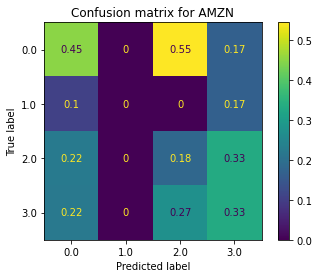

              precision    recall  f1-score   support

         0.0       0.45      0.97      0.61       213
         1.0       0.00      0.00      0.00        49
         2.0       0.18      0.02      0.03       107
         3.0       0.33      0.02      0.04       106

    accuracy                           0.44       475
   macro avg       0.24      0.25      0.17       475
weighted avg       0.32      0.44      0.29       475



/Users/dylanmace/miniforge3/envs/ml_proj/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


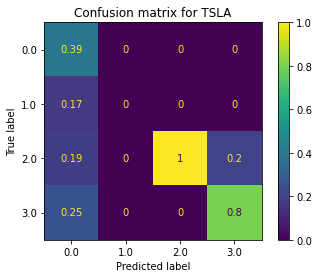

/Users/dylanmace/miniforge3/envs/ml_proj/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


              precision    recall  f1-score   support

         0.0       0.39      1.00      0.57       185
         1.0       0.00      0.00      0.00        78
         2.0       1.00      0.01      0.02        89
         3.0       0.80      0.03      0.06       123

    accuracy                           0.40       475
   macro avg       0.55      0.26      0.16       475
weighted avg       0.55      0.40      0.24       475



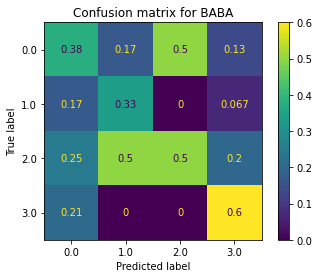

              precision    recall  f1-score   support

         0.0       0.38      0.97      0.54       121
         1.0       0.33      0.04      0.06        56
         2.0       0.50      0.01      0.02        83
         3.0       0.60      0.12      0.20        73

    accuracy                           0.39       333
   macro avg       0.45      0.28      0.21       333
weighted avg       0.45      0.39      0.26       333



/Users/dylanmace/miniforge3/envs/ml_proj/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


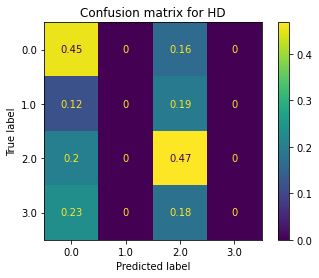

              precision    recall  f1-score   support

         0.0       0.45      0.53      0.49       118
         1.0       0.00      0.00      0.00        81
         2.0       0.47      0.85      0.60       185
         3.0       0.00      0.00      0.00        91

    accuracy                           0.46       475
   macro avg       0.23      0.35      0.27       475
weighted avg       0.29      0.46      0.36       475



/Users/dylanmace/miniforge3/envs/ml_proj/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


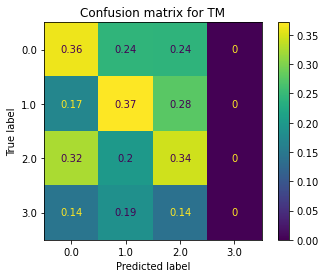

              precision    recall  f1-score   support

         0.0       0.36      0.75      0.49       153
         1.0       0.37      0.25      0.30       104
         2.0       0.34      0.20      0.26       147
         3.0       0.00      0.00      0.00        71

    accuracy                           0.36       475
   macro avg       0.27      0.30      0.26       475
weighted avg       0.30      0.36      0.30       475



/Users/dylanmace/miniforge3/envs/ml_proj/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


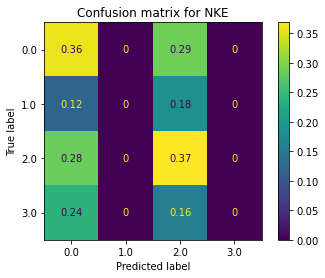

              precision    recall  f1-score   support

         0.0       0.36      0.46      0.40       150
         1.0       0.00      0.00      0.00        75
         2.0       0.37      0.65      0.47       159
         3.0       0.00      0.00      0.00        91

    accuracy                           0.36       475
   macro avg       0.18      0.28      0.22       475
weighted avg       0.24      0.36      0.28       475



/Users/dylanmace/miniforge3/envs/ml_proj/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


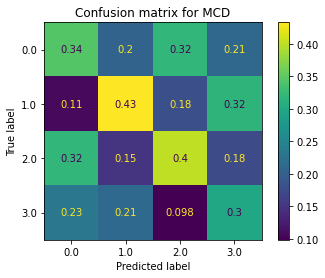

              precision    recall  f1-score   support

         0.0       0.34      0.43      0.38       135
         1.0       0.43      0.49      0.46       113
         2.0       0.40      0.37      0.39       132
         3.0       0.30      0.18      0.22        95

    accuracy                           0.38       475
   macro avg       0.37      0.37      0.36       475
weighted avg       0.37      0.38      0.37       475



/Users/dylanmace/miniforge3/envs/ml_proj/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


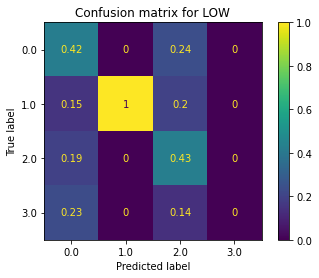

              precision    recall  f1-score   support

         0.0       0.42      0.55      0.48       148
         1.0       1.00      0.02      0.05        86
         2.0       0.43      0.76      0.55       157
         3.0       0.00      0.00      0.00        84

    accuracy                           0.43       475
   macro avg       0.46      0.33      0.27       475
weighted avg       0.45      0.43      0.34       475



/Users/dylanmace/miniforge3/envs/ml_proj/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


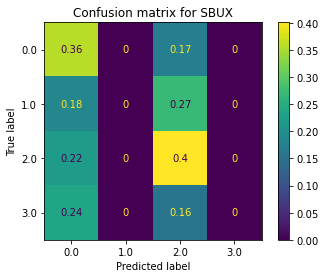

/Users/dylanmace/miniforge3/envs/ml_proj/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


              precision    recall  f1-score   support

         0.0       0.36      0.54      0.43       114
         1.0       0.00      0.00      0.00       114
         2.0       0.40      0.76      0.52       159
         3.0       0.00      0.00      0.00        88

    accuracy                           0.39       475
   macro avg       0.19      0.33      0.24       475
weighted avg       0.22      0.39      0.28       475



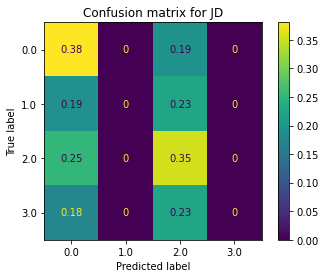

              precision    recall  f1-score   support

         0.0       0.38      0.95      0.54       127
         1.0       0.00      0.00      0.00        68
         2.0       0.35      0.12      0.18        91
         3.0       0.00      0.00      0.00        63

    accuracy                           0.38       349
   macro avg       0.18      0.27      0.18       349
weighted avg       0.23      0.38      0.24       349



/Users/dylanmace/miniforge3/envs/ml_proj/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


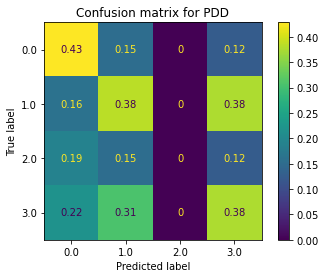

              precision    recall  f1-score   support

         0.0       0.43      0.90      0.58        50
         1.0       0.38      0.33      0.36        30
         2.0       0.00      0.00      0.00        25
         3.0       0.38      0.09      0.14        34

    accuracy                           0.42       139
   macro avg       0.30      0.33      0.27       139
weighted avg       0.33      0.42      0.32       139



/Users/dylanmace/miniforge3/envs/ml_proj/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


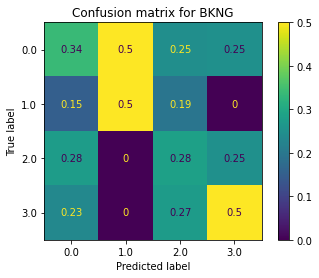

              precision    recall  f1-score   support

         0.0       0.34      0.67      0.45       144
         1.0       0.50      0.01      0.02        80
         2.0       0.28      0.40      0.33       132
         3.0       0.50      0.02      0.03       119

    accuracy                           0.32       475
   macro avg       0.41      0.27      0.21       475
weighted avg       0.39      0.32      0.24       475



/Users/dylanmace/miniforge3/envs/ml_proj/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


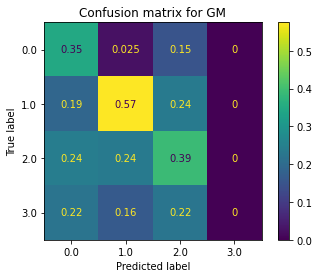

              precision    recall  f1-score   support

         0.0       0.35      0.51      0.41        86
         1.0       0.57      0.35      0.43       133
         2.0       0.39      0.68      0.50       155
         3.0       0.00      0.00      0.00       101

    accuracy                           0.41       475
   macro avg       0.33      0.38      0.34       475
weighted avg       0.35      0.41      0.36       475



/Users/dylanmace/miniforge3/envs/ml_proj/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


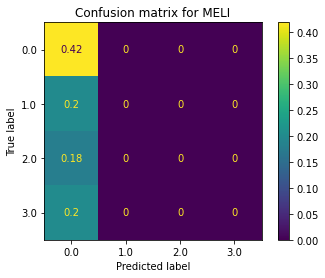

              precision    recall  f1-score   support

         0.0       0.42      1.00      0.59       199
         1.0       0.00      0.00      0.00        95
         2.0       0.00      0.00      0.00        85
         3.0       0.00      0.00      0.00        96

    accuracy                           0.42       475
   macro avg       0.10      0.25      0.15       475
weighted avg       0.18      0.42      0.25       475



/Users/dylanmace/miniforge3/envs/ml_proj/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


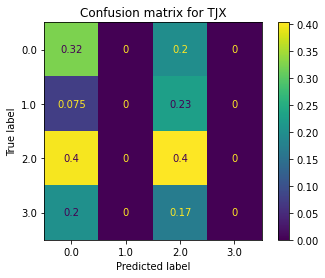

/Users/dylanmace/miniforge3/envs/ml_proj/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


              precision    recall  f1-score   support

         0.0       0.32      0.48      0.39       116
         1.0       0.00      0.00      0.00        82
         2.0       0.40      0.64      0.49       191
         3.0       0.00      0.00      0.00        86

    accuracy                           0.37       475
   macro avg       0.18      0.28      0.22       475
weighted avg       0.24      0.37      0.29       475



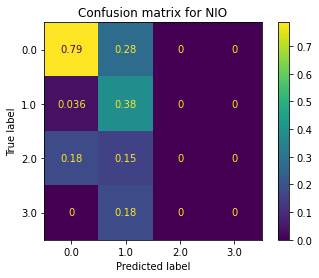

              precision    recall  f1-score   support

         0.0       0.79      0.43      0.56        51
         1.0       0.38      0.98      0.55        41
         2.0       0.00      0.00      0.00        21
         3.0       0.00      0.00      0.00        19

    accuracy                           0.47       132
   macro avg       0.29      0.35      0.28       132
weighted avg       0.42      0.47      0.39       132



/Users/dylanmace/miniforge3/envs/ml_proj/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


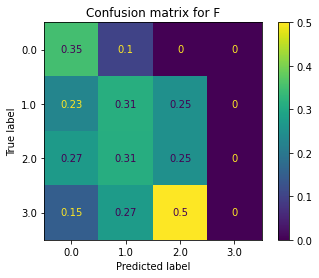

              precision    recall  f1-score   support

         0.0       0.35      0.53      0.42        76
         1.0       0.31      0.81      0.45       139
         2.0       0.25      0.01      0.01       143
         3.0       0.00      0.00      0.00       117

    accuracy                           0.32       475
   macro avg       0.23      0.33      0.22       475
weighted avg       0.22      0.32      0.20       475



/Users/dylanmace/miniforge3/envs/ml_proj/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


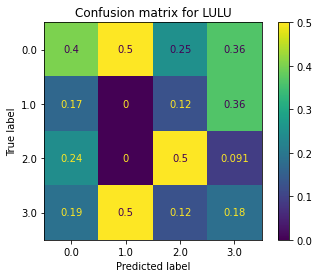

              precision    recall  f1-score   support

         0.0       0.40      0.96      0.57       189
         1.0       0.00      0.00      0.00        81
         2.0       0.50      0.03      0.06       116
         3.0       0.18      0.02      0.04        89

    accuracy                           0.40       475
   macro avg       0.27      0.25      0.17       475
weighted avg       0.32      0.40      0.25       475



/Users/dylanmace/miniforge3/envs/ml_proj/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


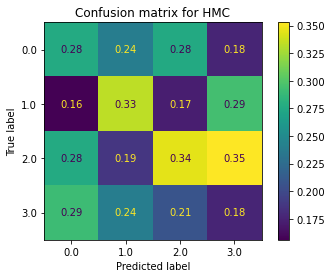

              precision    recall  f1-score   support

         0.0       0.28      0.33      0.30       119
         1.0       0.33      0.75      0.46       128
         2.0       0.34      0.09      0.14       109
         3.0       0.18      0.03      0.04       119

    accuracy                           0.31       475
   macro avg       0.28      0.30      0.24       475
weighted avg       0.28      0.31      0.24       475



/Users/dylanmace/miniforge3/envs/ml_proj/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


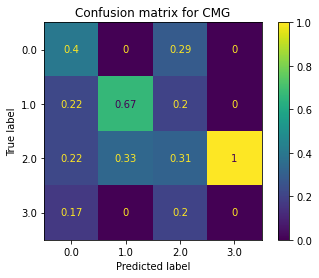

              precision    recall  f1-score   support

         0.0       0.40      0.95      0.56       185
         1.0       0.67      0.02      0.04       103
         2.0       0.31      0.10      0.15       108
         3.0       0.00      0.00      0.00        79

    accuracy                           0.40       475
   macro avg       0.35      0.27      0.19       475
weighted avg       0.37      0.40      0.26       475



In [3]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
from sklearn.svm import SVC

for ticker in tickers:
    data = pd.read_csv(f'./data_with_labels/{ticker}_with_labels.csv')
    features, labels = data.drop(['policy', 'Date'], axis=1), data['policy']
    
    X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, shuffle=True)
    
    # build and fit a random forest classifier on X_train and y_train
    svm = SVC()
    svm.fit(X_train, y_train)
    # evaluate accuracy of random forest

    y_pred = svm.predict(X_test)

    plot_confusion_matrix(svm, X_test, y_test, normalize='pred')
    plt.title(f'Confusion matrix for {ticker}')
    plt.show()
    
    print(classification_report(y_test, y_pred, zero_division=0))